In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil.parser import parse

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
CryptoMarkets = pd.read_csv('../input/all-crypto-currencies/crypto-markets.csv')

all-crypto-currencies



Note that date is an ***object type series*** in this dataframe which is not good when we are going to apply multuple time reated operations. 

In [11]:
CryptoMarkets.dtypes

slug            object
symbol          object
name            object
date            object
ranknow          int64
open           float64
high           float64
low            float64
close          float64
volume           int64
market           int64
close_ratio    float64
spread         float64
dtype: object

****Importance of date in Time Series****

The data contains a particular date and prices on that date. But this is still not read as a TimeSeries object as the data types are ‘object’ and ‘int’. In order to read the data as a time series, we have to pass special arguments to the read_csv command:


In [12]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
cm = pd.read_csv('../input/all-crypto-currencies/crypto-markets.csv', parse_dates=['date'], index_col='date', date_parser=dateparse)
cm.dtypes

slug            object
symbol          object
name            object
ranknow          int64
open           float64
high           float64
low            float64
close          float64
volume           int64
market           int64
close_ratio    float64
spread         float64
dtype: object

In [13]:
cm.head()

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2013-04-28,bitcoin,BTC,Bitcoin,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
2013-04-29,bitcoin,BTC,Bitcoin,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
2013-04-30,bitcoin,BTC,Bitcoin,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
2013-05-01,bitcoin,BTC,Bitcoin,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
2013-05-02,bitcoin,BTC,Bitcoin,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32


We can also explicitly convert to datetime using
**dataframe[columnName] = dataframe.to_datetime[columnName]**

you can read more about it on following link 

https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates

In [14]:
dm = pd.read_csv('../input/all-crypto-currencies/crypto-markets.csv')  
dm['date'] = pd.to_datetime(dm['date'])

In [15]:
dm.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32


In [22]:
cmopen=cm.iloc[:50,4]
cmhigh=cm.iloc[:50,5]
cmlow=cm.iloc[:50,6]
cmclose=cm.iloc[:50,7]

In [23]:
cmopen.head()

date
2013-04-28    135.30
2013-04-29    134.44
2013-04-30    144.00
2013-05-01    139.00
2013-05-02    116.38
Name: open, dtype: float64

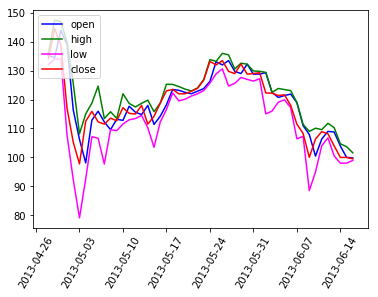

In [24]:
plt.plot(cmopen, color='blue', label='open')
plt.plot(cmhigh, color='green', label='high')
plt.plot(cmlow, color='magenta', label='low')
plt.plot(cmclose, color='red', label='close')
plt.legend(loc='upper left')
plt.xticks(rotation=60)
plt.show()

**How to Select a Time Window **

We have selected specific time windows from the data set and we can compare open and close prices by placing them parallel in two seperate graphs

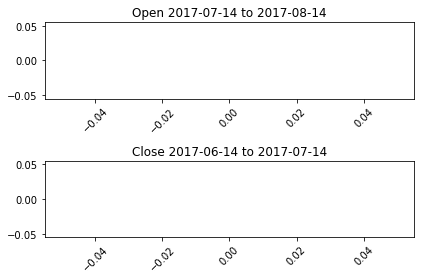

In [25]:
# Select Time Window based on YYYY-mm-dd
view = cmopen['2017-08-14':'2017-07-14']
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('Open 2017-07-14 to 2017-08-14')
plt.plot(view,color ='blue')


view = cmclose['2017-07-14':'2017-06-14']
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('Close 2017-06-14 to 2017-07-14')
plt.plot(view,color ='violet')

plt.tight_layout()
plt.show()

# Select Time Window based on YYYY-mm
view = cmhigh['2017-07':'2017-06']
plt.xticks(rotation=0)
plt.title('High 2017-06-14 to 2017-07-14')
plt.plot(view,color ='green')

**Plotting moving averages**

to plot moving averages first we need to calculate moving averages


In [ ]:
cm_open_ma=pd.rolling_mean(cmopen,2)
cm_close_ma=pd.rolling_mean(cmclose,2)

In [ ]:
# view = cm_open_ma['2017-08-14':'2017-07-14']
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('Moving Average Open')
plt.plot(cm_open_ma,color ='blue')


# view = cm_close_ma['2017-07-14':'2017-06-14']
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('Moving Average Close')
plt.plot(cm_close_ma,color ='violet')

plt.tight_layout()
plt.show()

Daily Moving Averages

In [ ]:
cm_high_ma=pd.rolling_mean(cmhigh,2,2,'D')
cm_low_ma=pd.rolling_mean(cmlow,2,2,'D')

# view = cm_open_ma['2017-08-14':'2017-07-14']
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('Daily Moving Average High')
plt.plot(cm_high_ma,color ='yellow')


# view = cm_close_ma['2017-07-14':'2017-06-14']
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('Daily Moving Average Low')
plt.plot(cm_low_ma,color ='black')

plt.tight_layout()
plt.show()

In [ ]:
cm_high_ma=pd.rolling_std(cmhigh,2,2,'D')
cm_low_ma=pd.rolling_std(cmlow,2,2,'D')

# view = cm_open_ma['2017-08-14':'2017-07-14']
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('Daily Moving Standard Deviation High')
plt.plot(cm_high_ma,color ='yellow')


# view = cm_close_ma['2017-07-14':'2017-06-14']
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('Daily Standard Deviation Average Low')
plt.plot(cm_low_ma,color ='black')

plt.tight_layout()
plt.show()